## Solution to Reinforcement Learning - Assignment 1
### Author: Kamal Mishra
### Date last changed: 16-Feb-2021

This is based on problem given by Professor as in Chapter 2.3 of the RL Book - Sutton & Barto and based on the problem details shared as on 30-Jan-2021 session.

### Problem Statement and Considerations

Considerations:

* No of arms = 20
* Consider a set of 2000 randomly generated 20-armed bandit problem. (Later try for 3000 or 4000 iterations etc if possible..)
* For each of the 2000 bandit problems, initially select action values q*(a), a=1,2,3,.....20
* We will try to consider normal distribution; For N(0,1) Normal distribution: with mean=0, variance=1
* This will be kind of a simulation exercise.
* For every arm fix, q* values for every arm. As per normal distribution, q*(a) = Expected value of the reward you obtain given action a is chosen.

* Random reward is obtained in the following manner: Random reward when pulling arm a is obtained as Rt ~ N(q*(At),1)  --- work with random rewards. Then, Run the method for 2000 time steps and then average for the 2000 randomly generated bandit problems.

* Consider two initial conditions for the estimate Q0 as i) Q0=0; ii) Q0=5. Compare greedy method (epsilon=0) with epsilon greedy methods with epsilon= 0.05, 0.1, 0.5 . Repeat the exercise with reward variance of 10 instead of 1. Thus Rt ~ N(q*(At),10)

In this setup, we will need some iterations. Hence it may become computationally intensive. We will try to get average and no of steps taken in the process. If we need to calculate the mean/average at step n, mean_n, we can do it with the previous mean, mean_n−1 and n as follows: mean(n) = mean(n-1) + [Rn - mean(n-1)]/n

### Import desired libraries

In [5]:
# Get all the relevant libraries loaded

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import nbimporter

%matplotlib inline

### Epsilon(ϵ) and Epsilon-Greedy Approach

We have defined the class "epsilon_bandit" which can be used to run our experiments. This class takes inputs as the following: number of arms: k, epsilon values: epsilon, number of steps: iterations. We will also define "mu" that we can use to adjust the average rewards of each of the arms. We are also considering randomly generated probability distribution (Normal distribution).

In [6]:
class epsilon_bandit:
    '''
    Epsilon and Epsilon-greedy multi-armed bandits (MABPs)
    Inputs
    =====================================================
    Define          k: number of arms (int)
    Define    epsilon: probability of random action, 0 < epsilon < 1 (float)
    Define iterations: number of steps (int)
    Define         mu: Set the average rewards for each of the k-arms.
                       Set to "random" for the rewards to be selected from a
                       Normal Distribution with mean or avg = 0. 
                       Set to "sequence" for the means to be ordered from 0 to k-1.
                       Pass a list or array of length = k for user-defined values.
    '''
    def __init__(self, k, epsilon, iterations, mu='random'):
        self.k = k  # Number of arms
        self.epsilon = epsilon # Search probability
        self.iterations = iterations # Number of iterations
        
        self.n = 0 # Step count
        self.k_n = np.zeros(k) # Step count for each arm
        
        self.mean_reward = 0 # Total mean reward
        self.reward = np.zeros(iterations)
        self.k_reward = np.zeros(k) # Mean reward for each arm
        
        if type(mu) == list or type(mu).__module__ == np.__name__:
            self.mu = np.array(mu) # User-defined averages
        elif mu == 'random':
            self.mu = np.random.normal(0, 1, k) # Draw average from probability distribution
        elif mu == 'sequence':
            self.mu = np.linspace(0, k-1, k) # Increase the average for each arm by one
        
    def pull(self):
        p = np.random.rand() # Use rand() to generate random number from numpy library
        
        if self.epsilon == 0 and self.n == 0:
            a = np.random.choice(self.k)
        elif p < self.epsilon:
            a = np.random.choice(self.k) # Randomly select an action
        else:
            a = np.argmax(self.k_reward) # Take greedy action
            
        reward = np.random.normal(self.mu[a], 1)
        
        # Update counts
        self.n += 1
        self.k_n[a] += 1
        
        # Update total
        self.mean_reward = self.mean_reward + (reward - self.mean_reward) / self.n
        
        # Update results for a_k
        self.k_reward[a] = self.k_reward[a] + (reward - self.k_reward[a]) / self.k_n[a]
        
    '''
    We would like to call or invoke run() method at a later time to 
    validate our outputs.
    The average reward for each arm are drawn from a normal distribution.
    We are setting mu="sequence" that will cause the rewards to range from
    0 to k-1 to make it easy to know which actions provide the best rewards 
    when evaluating the results and which actions were taken. 
    Finally, we can also set our own average rewards by passing values to mu.
    '''
    def run(self):
        for i in range(self.iterations):
            self.pull()
            self.reward[i] = self.mean_reward
            
    def reset(self):
        # Resets results while keeping settings
        self.n = 0
        self.k_n = np.zeros(k)
        self.mean_reward = 0
        self.reward = np.zeros(iters)
        self.k_reward = np.zeros(k)

### Experiment 1:

Now we will set up comparisons using different values of epsilon, keeping k=20 for 20-arm bandit scenario. For each of these, k is already set to 20, run 2000 steps for each episode. After each episode, we will reset the bandits and copy averages across the different bandits to keep things consistent.

In [7]:
k = 20
iterations = 2000

eps_0_rewards = np.zeros(iterations) # Greedy option with epsilon=0
eps_05_rewards = np.zeros(iterations)
eps_10_rewards = np.zeros(iterations)
eps_50_rewards = np.zeros(iterations)

In [8]:
episodes = 2000

# Run experiments
# epsilon= 0, 0.05, 0.1, 0.5

for i in range(episodes):
    # Initialize bandits for 4 probabilities, i.e. 4 ϵ values
    eps_0 = epsilon_bandit(k, 0, iterations)
    eps_05 = epsilon_bandit(k, 0.05, iterations, eps_0.mu.copy())
    eps_10 = epsilon_bandit(k, 0.1, iterations, eps_0.mu.copy())
    eps_50 = epsilon_bandit(k, 0.5, iterations, eps_0.mu.copy())
    
    # Run experiments
    eps_0.run()
    eps_05.run()
    eps_10.run()
    eps_50.run()
    
    # Update long-term averages
    eps_0_rewards = eps_0_rewards + (eps_0.reward - eps_0_rewards) / (i + 1)
    eps_05_rewards = eps_05_rewards + (eps_05.reward - eps_05_rewards) / (i + 1)
    eps_10_rewards = eps_10_rewards + (eps_10.reward - eps_10_rewards) / (i + 1)
    eps_50_rewards = eps_50_rewards + (eps_50.reward - eps_50_rewards) / (i + 1)
    

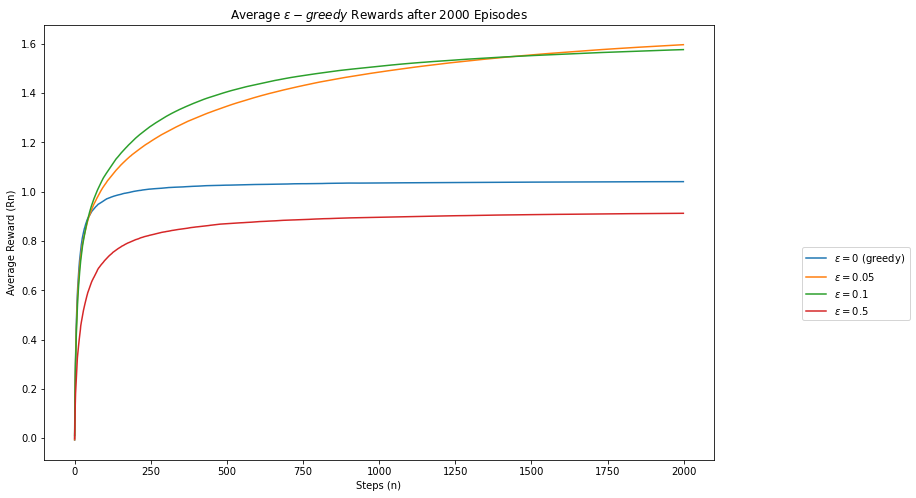

In [9]:
# We will plot Average Reward vs No of steps

plt.figure(figsize=(12,8))
plt.plot(eps_0_rewards, label="$\epsilon=0$ (greedy)")
plt.plot(eps_05_rewards, label="$\epsilon=0.05$")
plt.plot(eps_10_rewards, label="$\epsilon=0.1$")
plt.plot(eps_50_rewards, label="$\epsilon=0.5$")
plt.legend(bbox_to_anchor=(1.3, 0.5))
plt.xlabel("Steps (n)")
plt.ylabel("Average Reward (Rn)")
plt.title("Average $\epsilon-greedy$ Rewards after " + str(episodes) 
    + " Episodes")
plt.show()
    

### Interpretation 1:

* **20-arm** test bed considered, **2000 steps** considered, **mu=Random generated N.D**. We have plotted **Average reward (Rn) v/s No of steps (n)** above.
* Based on above chart outcome, We have compared the greedy function (ϵ=0) which underperforms w.r.t. the other two ϵ-greedy approaches consistently (ϵ=0.05 and ϵ=0.1).
* At the same time, ϵ=0.5 seems to underperform compared to all other options, surprisingly. i.e. when we have increased value of ϵ a lot from 0.1 to 0.5, then we don't see that optimal advantage.
* Best option seems to be the **ϵ-greedy with ϵ=0.05** in this scenario.
* Overall **ϵ-greedy works better than greedy approach (i.e. ϵ=0)**.

Next - we will experiment using the **sequence** argument and see how the optimal action is taken per episode because averages remain consistent.


### Experiment 2:

In [10]:
k = 20
iterations = 2000

eps_0_rewards = np.zeros(iterations)
eps_05_rewards = np.zeros(iterations)
eps_10_rewards = np.zeros(iterations)
eps_50_rewards = np.zeros(iterations)

eps_0_selection = np.zeros(k)
eps_05_selection = np.zeros(k)
eps_10_selection = np.zeros(k)
eps_50_selection = np.zeros(k)

In [11]:
episodes = 2000

# Run experiments
# epsilon= 0, 0.05, 0.1, 0.5

for i in range(episodes):
    # Initialize bandits
    eps_0 = epsilon_bandit(k, 0, iterations, mu='sequence')
    eps_05 = epsilon_bandit(k, 0.05, iterations, eps_0.mu.copy())
    eps_10 = epsilon_bandit(k, 0.1, iterations, eps_0.mu.copy())
    eps_50 = epsilon_bandit(k, 0.5, iterations, eps_0.mu.copy())
    
    # Run experiments
    eps_0.run()
    eps_05.run()
    eps_10.run()
    eps_50.run()
    
    # Update long-term averages
    eps_0_rewards = eps_0_rewards + (eps_0.reward - eps_0_rewards) / (i + 1)
    eps_05_rewards = eps_05_rewards + (eps_05.reward - eps_05_rewards) / (i + 1)
    eps_10_rewards = eps_10_rewards + (eps_10.reward - eps_10_rewards) / (i + 1)
    eps_50_rewards = eps_50_rewards + (eps_50.reward - eps_50_rewards) / (i + 1)

    # Average actions per episode
    eps_0_selection = eps_0_selection + (eps_0.k_n - eps_0_selection) / (i + 1)
    eps_05_selection = eps_05_selection + (eps_05.k_n - eps_05_selection) / (i + 1)
    eps_10_selection = eps_10_selection + (eps_10.k_n - eps_10_selection) / (i + 1)
    eps_50_selection = eps_50_selection + (eps_50.k_n - eps_50_selection) / (i + 1)
    

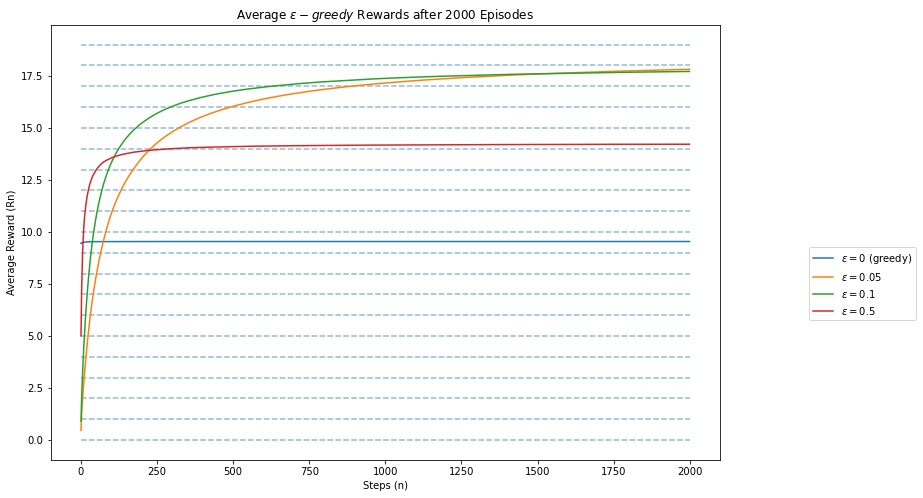

In [12]:
# We will again plot Average Reward vs No of steps

plt.figure(figsize=(12,8))
plt.plot(eps_0_rewards, label="$\epsilon=0$ (greedy)")
plt.plot(eps_05_rewards, label="$\epsilon=0.05$")
plt.plot(eps_10_rewards, label="$\epsilon=0.1$")
plt.plot(eps_50_rewards, label="$\epsilon=0.5$")
for i in range(k):
    plt.hlines(eps_0.mu[i],xmin=0,xmax=iterations,alpha=0.5,linestyle="--")
plt.legend(bbox_to_anchor=(1.3, 0.5))
plt.xlabel("Steps (n)")
plt.ylabel("Average Reward (Rn)")
plt.title("Average $\epsilon-greedy$ Rewards after " + str(episodes) + " Episodes")
plt.show()


### Interpretation 2:

Here we can see the following effect:

* It is clearer that when we use the sequence argument, and then we can get a feel for how often the optimal action is taken per episode because the averages remain consistent across episodes.
* ϵ=0 (Greedy) option underperforms compared to all other epsilon greedy methods now.
* ϵ=0.05 still seems the optimal.
* **ϵ=0.05 and ϵ=0.1 are performing better**, while when we further increase ϵ value to 0.5, it is not that optimal surprisingly.

### Experiment 2b:

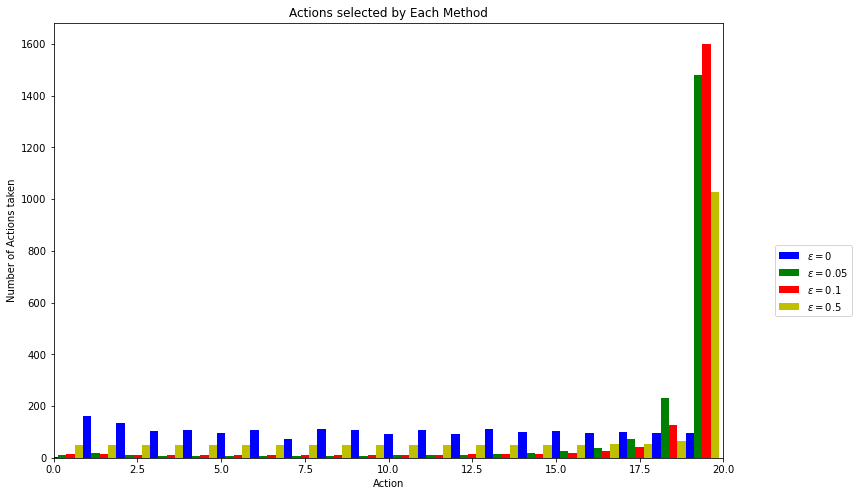

Percentage of actions selected:


,a = 0,a = 1,a = 2,a = 3,a = 4,a = 5,a = 6,a = 7,a = 8,a = 9,a = 10,a = 11,a = 12,a = 13,a = 14,a = 15,a = 16,a = 17,a = 18,a = 19
$\epsilon=0$,0.14065,8.099875,6.759650,5.099825,5.300000,4.70000,5.450000,3.700000,5.600000,5.400000,4.600000,5.350000,4.600000,5.500000,5.050000,5.250000,4.80000,4.950000,4.800000,4.850000
$\epsilon=0.05$,0.48095,0.958675,0.455400,0.307175,0.340000,0.34515,0.378050,0.364375,0.413750,0.413375,0.506125,0.546500,0.578150,0.726550,0.882375,1.276575,1.80750,3.676700,11.601100,73.941525
$\epsilon=0.1$,0.64470,0.810625,0.593650,0.526300,0.528475,0.55690,0.560350,0.563700,0.570275,0.590850,0.603250,0.614475,0.664875,0.742850,0.787350,0.890075,1.28620,2.074225,6.307100,80.083775
$\epsilon=0.5$,2.52370,2.524100,2.507175,2.497350,2.498925,2.49630,2.506275,2.514950,2.507625,2.504225,2.514850,2.512350,2.510250,2.522525,2.536750,2.535300,2.59005,2.689300,3.170675,51.337325


In [13]:
bins = np.linspace(0, k-1, k)

plt.figure(figsize=(12,8))
plt.bar(bins, eps_0_selection, width = 0.25, color='b', label="$\epsilon=0$")
plt.bar(bins+0.25, eps_05_selection, width=0.25, color='g', label="$\epsilon=0.05$")
plt.bar(bins+0.5, eps_10_selection, width=0.25, color='r', label="$\epsilon=0.1$")
plt.bar(bins+0.75, eps_50_selection, width=0.25, color='y', label="$\epsilon=0.5$")

plt.legend(bbox_to_anchor=(1.2, 0.5))
plt.xlim([0,k])
plt.title("Actions selected by Each Method")
plt.xlabel("Action")
plt.ylabel("Number of Actions taken")
plt.show()

opt_per = np.array([eps_0_selection, eps_05_selection, eps_10_selection, eps_50_selection]) / iterations * 100

df = pd.DataFrame(opt_per, index=['$\epsilon=0$', '$\epsilon=0.05$', '$\epsilon=0.1$', '$\epsilon=0.5$'],
                 columns=["a = " + str(x) for x in range(0, k)])

# Percentage of actions selected for all 20 arms
print("Percentage of actions selected:")
df

### Interpretation 2b:

* If we look at above experimentation, with the average selection of methods/algorithms, we observe that why the larger ϵ value performs well up to ϵ=0.1, it takes the optimal selection around 80.2% of the time.
* We observed that ϵ=0.5 does not perform better than ϵ=0.1 as it takes the optimal selection around 51.3% only. (of course this is when a=19). 
* However, for most arms, till a=17, the percentage of actions selected are much higher for higher values of epsilon (with ϵ-greedy scenarios).

### Experiment 3:

* Now we are considering **3000 time steps, same 20-arm testbed**.
* With mu = sequence argument i.e. self.mu = np.linspace(0, k-1, k) # Increase the average for each arm by one
* Compare between ϵ and ϵ-greedy scenarios. (i.e. ϵ = 0, 0.05, 0.1, 0.5)

In [14]:
k = 20
iterations = 3000

eps_0_rewards = np.zeros(iterations)
eps_05_rewards = np.zeros(iterations)
eps_10_rewards = np.zeros(iterations)
eps_50_rewards = np.zeros(iterations)

eps_0_selection = np.zeros(k)
eps_05_selection = np.zeros(k)
eps_10_selection = np.zeros(k)
eps_50_selection = np.zeros(k)

In [15]:
episodes = 3000

# Run experiments
# epsilon= 0, 0.05, 0.1, 0.5

for i in range(episodes):
    # Initialize bandits
    eps_0 = epsilon_bandit(k, 0, iterations, mu='sequence')
    eps_05 = epsilon_bandit(k, 0.05, iterations, eps_0.mu.copy())
    eps_10 = epsilon_bandit(k, 0.1, iterations, eps_0.mu.copy())
    eps_50 = epsilon_bandit(k, 0.5, iterations, eps_0.mu.copy())
    
    # Run experiments
    eps_0.run()
    eps_05.run()
    eps_10.run()
    eps_50.run()
    
    # Update long-term averages
    eps_0_rewards = eps_0_rewards + (eps_0.reward - eps_0_rewards) / (i + 1)
    eps_05_rewards = eps_05_rewards + (eps_05.reward - eps_05_rewards) / (i + 1)
    eps_10_rewards = eps_10_rewards + (eps_10.reward - eps_10_rewards) / (i + 1)
    eps_50_rewards = eps_50_rewards + (eps_50.reward - eps_50_rewards) / (i + 1)

    # Average actions per episode
    eps_0_selection = eps_0_selection + (eps_0.k_n - eps_0_selection) / (i + 1)
    eps_05_selection = eps_05_selection + (eps_05.k_n - eps_05_selection) / (i + 1)
    eps_10_selection = eps_10_selection + (eps_10.k_n - eps_10_selection) / (i + 1)
    eps_50_selection = eps_50_selection + (eps_50.k_n - eps_50_selection) / (i + 1)
    

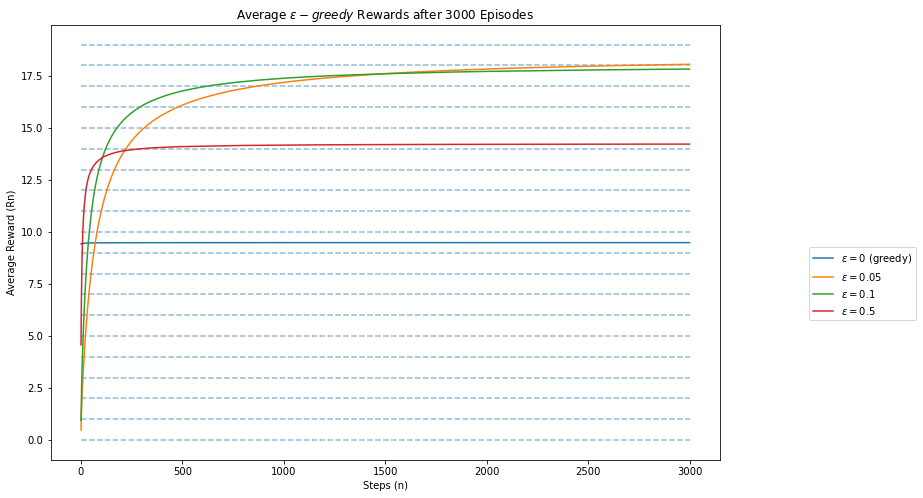

In [16]:
# We will again plot Average Reward vs No of steps

plt.figure(figsize=(12,8))
plt.plot(eps_0_rewards, label="$\epsilon=0$ (greedy)")
plt.plot(eps_05_rewards, label="$\epsilon=0.05$")
plt.plot(eps_10_rewards, label="$\epsilon=0.1$")
plt.plot(eps_50_rewards, label="$\epsilon=0.5$")
for i in range(k):
    plt.hlines(eps_0.mu[i],xmin=0,xmax=iterations,alpha=0.5,linestyle="--")
plt.legend(bbox_to_anchor=(1.3, 0.5))
plt.xlabel("Steps (n)")
plt.ylabel("Average Reward (Rn)")
plt.title("Average $\epsilon-greedy$ Rewards after " + str(episodes) + " Episodes")
plt.show()

### Interpretation 3:

* If we look at above experimentation, we increased from 2000 to 3000 steps and ϵ=0.05 marginally outperforms ϵ=0.1.
* The greedy ϵ=0 underperform compared to other ϵ-greedy experiments. 

Henceforth, we can notice the following inferences as well: 
* When we decrease the search space, it would likely benefit smaller values of ϵ as exploration would be less beneficial and vice versa. In our case, ϵ=0.05 was optimal compared to ϵ=0 or ϵ=0.01 etc or wherever ϵ<0.05 etc.
* Secondly, when we increase the number of steps, then it will begin to benefit the lower value of ϵ because it will have less random noise. In our case ϵ=0.1 and ϵ=0.05 performed better marginally in 3000 steps compared to 2000 steps with mu=sequence option chosen compared to random selection.
* Additionally, we have also noticed that **"the average reward" seems to be better when we use "sequence" argument**. i.e. we increase the average for each arm by one, while experimenting instead of just taking random values generated from normal probability distribution.

### Experiment 3b:

* With 5000 steps, everything else remains the same w.r.t. Experiment 3 above

In [17]:
# We are trying with 5000 steps

k = 20
iterations = 5000

eps_0_rewards = np.zeros(iterations)
eps_05_rewards = np.zeros(iterations)
eps_10_rewards = np.zeros(iterations)
eps_50_rewards = np.zeros(iterations)

eps_0_selection = np.zeros(k)
eps_05_selection = np.zeros(k)
eps_10_selection = np.zeros(k)
eps_50_selection = np.zeros(k)

In [18]:
episodes = 5000

# Run experiments
# epsilon= 0, 0.05, 0.1, 0.5

for i in range(episodes):
    # Initialize bandits
    eps_0 = epsilon_bandit(k, 0, iterations, mu='sequence')
    eps_05 = epsilon_bandit(k, 0.05, iterations, eps_0.mu.copy())
    eps_10 = epsilon_bandit(k, 0.1, iterations, eps_0.mu.copy())
    eps_50 = epsilon_bandit(k, 0.5, iterations, eps_0.mu.copy())
    
    # Run experiments
    eps_0.run()
    eps_05.run()
    eps_10.run()
    eps_50.run()
    
    # Update long-term averages
    eps_0_rewards = eps_0_rewards + (eps_0.reward - eps_0_rewards) / (i + 1)
    eps_05_rewards = eps_05_rewards + (eps_05.reward - eps_05_rewards) / (i + 1)
    eps_10_rewards = eps_10_rewards + (eps_10.reward - eps_10_rewards) / (i + 1)
    eps_50_rewards = eps_50_rewards + (eps_50.reward - eps_50_rewards) / (i + 1)

    # Average actions per episode
    eps_0_selection = eps_0_selection + (eps_0.k_n - eps_0_selection) / (i + 1)
    eps_05_selection = eps_05_selection + (eps_05.k_n - eps_05_selection) / (i + 1)
    eps_10_selection = eps_10_selection + (eps_10.k_n - eps_10_selection) / (i + 1)
    eps_50_selection = eps_50_selection + (eps_50.k_n - eps_50_selection) / (i + 1)

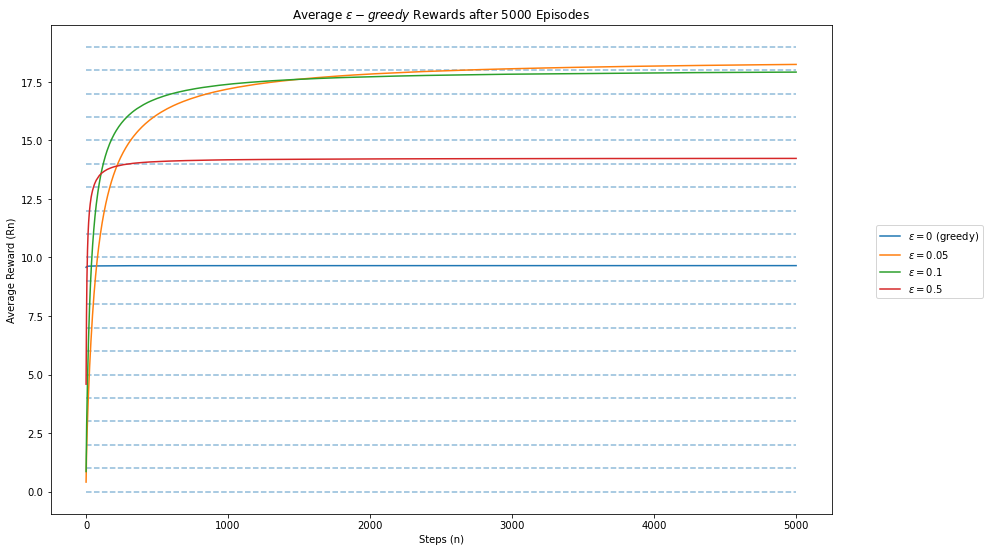

In [19]:
# We will again plot Average Reward vs No of steps

plt.figure(figsize=(14,9))
plt.plot(eps_0_rewards, label="$\epsilon=0$ (greedy)")
plt.plot(eps_05_rewards, label="$\epsilon=0.05$")
plt.plot(eps_10_rewards, label="$\epsilon=0.1$")
plt.plot(eps_50_rewards, label="$\epsilon=0.5$")
for i in range(k):
    plt.hlines(eps_0.mu[i],xmin=0,xmax=iterations,alpha=0.5,linestyle="--")
plt.legend(bbox_to_anchor=(1.2, 0.6))
plt.xlabel("Steps (n)")
plt.ylabel("Average Reward (Rn)")
plt.title("Average $\epsilon-greedy$ Rewards after " + str(episodes) + " Episodes")
plt.show()

### Interpretation 3b:

* When we extends from 3000 steps to 5000 steps, the observation remains almost similar to what we have noticed in Experiment 3 above.
* If we look at above experimentation, we increased from 3000 to 5000 steps and ϵ=0.05 marginally outperforms ϵ=0.1.
* The greedy ϵ=0 underperform compared to other ϵ-greedy experiments. 
* Averages are consistent across episodes.

So these are all consistent.

We have noticed that ϵ-greedy approaches have weakness in that they continue to include random noise no matter how many experiments they see. It will be better to focus on an optimal solution and continue to exploit it. To this end, we can introduce ϵ-decay which reduces the probability of exploration with every step. This works by defining ϵ as a function of the number of steps, n. We will try that experiment once with same 20-arm test bed and for 2000 steps.

### Experiment 3c:

### Epsilon-decay Approach

In [20]:
class epsilon_decay_bandit:
    '''
    Epsilon-decay k-bandit Approach
    Inputs
    =====================================================
    Define          k: Number of arms (int)
    Define iterations: Number of steps (int)
    Define         mu: Set the average rewards for each of the k-arms.
                       Set to "random" for the rewards to be selected from
                       a normal distribution with mean = 0. 
                       Set to "sequence" for the means to be ordered from 0 to k-1.
    Pass a list or array of length = k for user-defined values.
    '''
    def __init__(self, k, iterations, mu='random'):
        
        self.k = k # Number of arms
        self.iterations = iterations # Number of steps
        self.n = 0
        self.k_n = np.zeros(k) # Step count for each arm
        self.mean_reward = 0 # Total mean reward
        self.reward = np.zeros(iterations)
        self.k_reward = np.zeros(k) # Mean reward for each arm
        
        if type(mu) == list or type(mu).__module__ == np.__name__:
            # User-defined averages            
            self.mu = np.array(mu)
        elif mu == 'random':
            self.mu = np.random.normal(0, 1, k) # Draw means from probability distribution
        elif mu == 'sequence':
            self.mu = np.linspace(0, k-1, k) # Increase the mean for each arm by one
        
    def pull(self):
        p = np.random.rand() # Generate random number from numpy library
        if p < 1 / (1 + self.n / self.k):
            a = np.random.choice(self.k) # Randomly select an action
        else:
            a = np.argmax(self.k_reward) # Take greedy action
            
        reward = np.random.normal(self.mu[a], 1)
        
        # Update counts
        self.n += 1
        self.k_n[a] += 1
        
        # Update total
        self.mean_reward = self.mean_reward + (
            reward - self.mean_reward) / self.n
        
        # Update results for a_k
        self.k_reward[a] = self.k_reward[a] + (
            reward - self.k_reward[a]) / self.k_n[a]
        
    def run(self):
        for i in range(self.iterations):
            self.pull()
            self.reward[i] = self.mean_reward
            
    def reset(self):
        # Resets results while keeping settings
        self.n = 0
        self.k_n = np.zeros(k)
        self.mean_reward = 0
        self.reward = np.zeros(iterations)
        self.k_reward = np.zeros(k)

In [21]:
k = 20
iterations = 2000

epsilon_decay_rewards = np.zeros(iterations)
epsilon_1_rewards = np.zeros(iterations)

episodes = 2000
# Run experiments
for i in range(episodes):
    # Initialize bandits
    epsilon_decay = epsilon_decay_bandit(k, iterations)
    epsilon_1 = epsilon_bandit(k, 0.1, iterations, epsilon_decay.mu.copy())
    
    # Run experiments
    epsilon_decay.run()
    epsilon_1.run()
    
    # Update long-term averages
    epsilon_decay_rewards = epsilon_decay_rewards + (
        epsilon_decay.reward - epsilon_decay_rewards) / (i + 1)
    epsilon_1_rewards = epsilon_1_rewards + (
        epsilon_1.reward - epsilon_1_rewards) / (i + 1)

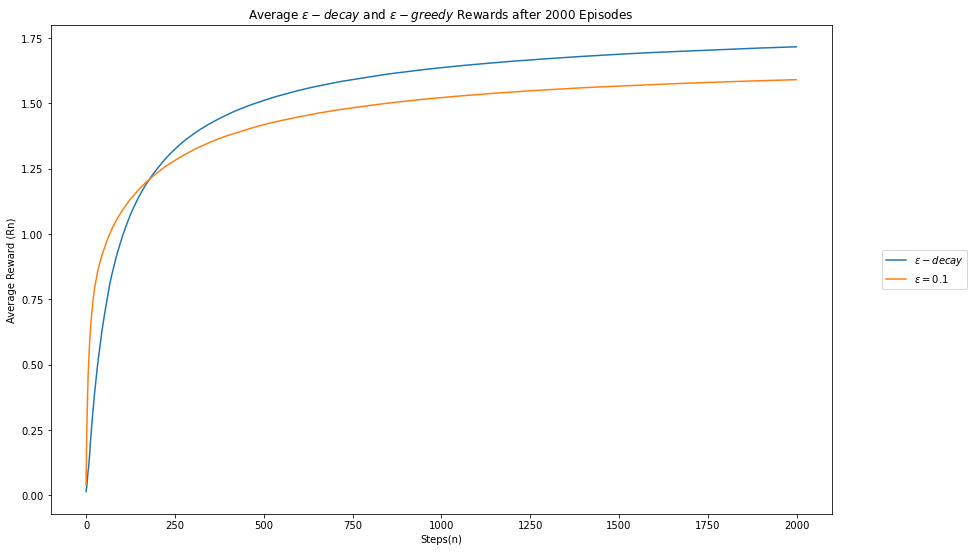

In [22]:
plt.figure(figsize=(14,9))
plt.plot(epsilon_decay_rewards, label="$\epsilon-decay$")
plt.plot(epsilon_1_rewards, label="$\epsilon=0.1$")
plt.legend(bbox_to_anchor=(1.18, 0.55))
plt.xlabel("Steps(n)")
plt.ylabel("Average Reward (Rn)")
plt.title("Average $\epsilon-decay$ and " + 
    "$\epsilon-greedy$ Rewards after " 
    + str(episodes) + " Episodes")
plt.show()

### Interpretation 3c:

* ϵ-decay approach marginally outperforms ϵ-greedy with (ϵ=0.1) considered here.

### UCB (Upper Confidence Bound) Approach

* Running the ucb_bandit class requires three arguments, the number of arms to pull (k), the exploration parameter (explore), the number of iterations (iterations), and optionally, the distribution of the rewards (by default the reward means are drawn from a normal distribution). 
* We can plan to run this for 2000 steps and average the rewards across each step to get an idea for how well the algorithm performs.

In [26]:
class ucb_bandit:
    '''
    Upper Confidence Bound k-bandit problem
    Inputs 
    ============================================
    k: number of arms (int)
    explore: exploration parameter (c as per assignment consideration)
    iterations: number of steps (int)
    mu: set the average rewards for each of the k-arms.
        Set to "random" for the rewards to be selected from
        a normal distribution with mean = 0. 
        Set to "sequence" for the means to be ordered from 
        0 to k-1.
        Pass a list or array of length = k for user-defined
        values.
    '''
    def __init__(self, k, explore, iterations, mu='random'):
        
        self.k = k # Number of arms
        self.explore = explore # Exploration parameter
        self.iterations = iterations # Number of iterations
        
        self.n = 1 # Step count
        self.k_n = np.ones(k) # Step count for each arm
        self.mean_reward = 0 # Total mean reward
        self.reward = np.zeros(iterations)
        self.k_reward = np.zeros(k) # Mean reward for each arm
         
        if type(mu) == list or type(mu).__module__ == np.__name__:
            self.mu = np.array(mu) # User-defined averages
        elif mu == 'random':
            self.mu = np.random.normal(0, 1, k) # Draw means from probability distribution
        elif mu == 'sequence':
            self.mu = np.linspace(0, k-1, k) # Increase the mean for each arm by one
         
    def pull(self):
        # Select action according to UCB Criteria
        a = np.argmax(self.k_reward + self.explore * np.sqrt((np.log(self.n)) / self.k_n))
        reward = np.random.normal(self.mu[a], 1)
         
        # Update counts
        self.n += 1
        self.k_n[a] += 1
         
        # Update total
        self.mean_reward = self.mean_reward + (reward - self.mean_reward) / self.n
         
        # Update results for a_k
        self.k_reward[a] = self.k_reward[a] + (reward - self.k_reward[a]) / self.k_n[a]
         
    def run(self):
        for i in range(self.iterations):
            self.pull()
            self.reward[i] = self.mean_reward
             
    def reset(self, mu=None):
        # Resets results while keeping settings
        self.n = 1
        self.k_n = np.ones(self.k)
        self.mean_reward = 0
        self.reward = np.zeros(iterations)
        self.k_reward = np.zeros(self.k)
        if mu == 'random':
            self.mu = np.random.normal(0, 1, self.k)

In [28]:
k = 20
iterations = 2000
 
ucb5_rewards = np.zeros(iterations)
ucb2_rewards = np.zeros(iterations)
ucb1_rewards = np.zeros(iterations)
# Initialize 1andits

# UCB with (explore parameter or c=1,2,5)
# exploration parameter = 5 does not work well
# exploration parameter = 2 works relatively better
# exploration parameter = 1 works best
ucb5 = ucb_bandit(k, 5, iterations)  
ucb2 = ucb_bandit(k, 2, iterations)  
ucb1 = ucb_bandit(k, 1, iterations)  
 
episodes = 2000
# Run experiments
for i in range(episodes): 
    ucb5.reset('random')
    ucb2.reset('random')
    ucb1.reset('random')
    
    # Run experiments
    ucb5.run()
    ucb2.run()
    ucb1.run()
     
    # Update long-term averages
    ucb5_rewards = ucb5_rewards + (ucb5.reward - ucb5_rewards) / (i + 1)
    ucb2_rewards = ucb2_rewards + (ucb2.reward - ucb2_rewards) / (i + 1)
    ucb1_rewards = ucb1_rewards + (ucb1.reward - ucb1_rewards) / (i + 1)

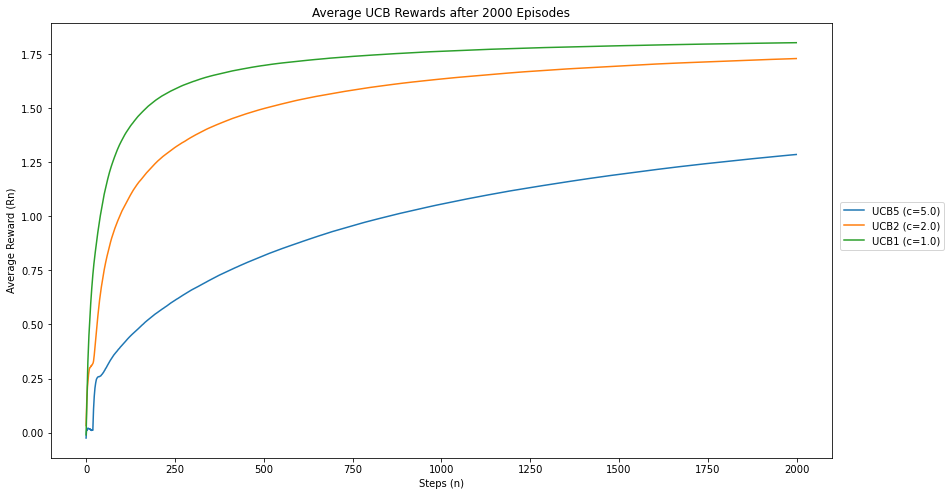

In [30]:
plt.figure(figsize=(14,8))
plt.plot(ucb5_rewards, label="UCB5 (c=5.0)")
plt.plot(ucb2_rewards, label="UCB2 (c=2.0)")
plt.plot(ucb1_rewards, label="UCB1 (c=1.0)")
plt.legend(bbox_to_anchor=(1.15, 0.6))
plt.xlabel("Steps (n)")
plt.ylabel("Average Reward (Rn)")
plt.title("Average UCB Rewards after " + str(episodes) + " Episodes")
plt.show()

### Interpretation 4:

* Higher Exploration Parameter => Less reward. We have seen this above. We have chosen c=5/2/1 (exploration parameter) for above chart.
* For UCB, c=1.0 (Exploration Parameter=1.0) has higher average reward than higher values of c.


### Summary of Interpretations:

* We have considered 20-arm bandits, 2000/3000/5000 steps and plotted average reward (Rn) vs number of steps, we have also considered randomly generated normal distribution.
* We have compared >> Greedy approach, ϵ-Greedy approach, ϵ-decay approach, UCB approach etc with various considerations with mu as random and sequence options.
* UCB approach seems to perform better. Within UCB, lower exploration parameter outperforms others with higher values of c or exploration parameter as far as average reward is concerned.
* ϵ-Greedy (with ϵ=0.05, ϵ=0.1) outperformed Greedy approaches (ϵ=0).
* UCB approach looks more optimal compared to others.
* No of steps 2000/3000/5000 did not significantly produce difference in average rewards. However, mu=sequence relatively produced better average reward compared to mu=random.
* We have tried multiple options of variance.
* Please also refer above: Interpretation 1 through Interpretation 4 for more details, charts and understanding that I was able to decipher from each experimentations.